# 共轭

In [1]:
norm(x)=sqrt(x'*x)

norm (generic function with 1 method)

In [97]:
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, fk, gk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, fn, gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [98]:
xn, fn, gn, steps=
ConjugateGradientFSO(
    (x,y)->x^2+(33/2)*y^2+3*x*y-x-29*y,
    (x,y)->[2*x+3*y-1,33*y+3*x-29],
    [2 3 ; 3 33],
    [2.,5.],
    debug=false
)

Convergence is reached after 2 iterations.


([-0.947368, 0.964912], -13.517543859649122, [-4.44089e-16, 0.0], Any[[2.0, 5.0], [1.45878, 0.730389], [-0.947368, 0.964912]])

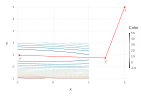

In [99]:
A=layer((x,y)->x^2+(33/2)*y^2+3*x*y-x-29*y, -1, 1, -1, 2);
B1=layer(
    x=[steps[i][1] for i in 1:length(steps)],
    y=[steps[i][2] for i in 1:length(steps)],
    label=[string(i) for i in 1:length(steps)],
    Geom.point, Geom.line, Geom.label,Theme(default_color="red"));
plot(A, B1)

# 最速

In [100]:
function search_for_alpha(f,xk,fk,d,g;
        α0=100,
        ϵ=0.5,
        t=0.5,)
        α=α0
        φ0=d'*g
    while f((xk.+α*d)...)>fk+ϵ*α*φ0
       α=t*α
    end
    return α
end


search_for_alpha (generic function with 1 method)

In [101]:
function steepest_descent(f,g,x0;
        ϵx=0.01,
        ϵf=0.01,
        ϵg=0.01,
        maxIterations=10000,
        debug=false)
      steps=[]
    xk=x0
    fk=f(xk...)
    for i in 1: maxIterations
        d=-g(xk...)
        α=search_for_alpha(f,xk,fk,d,-d)
        δ=α*d
        xn=xk.+δ
        fn=f(xn...)
        steps=push!(steps,xk)
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
             println("Convergence is reached after",i,"iterations.")
        return ( steps)
        end
        if debug
        println("i=",i, "xk=",xk)
        end
    xk=xn
    fk=fn
    end
    println("WARN",maxIterations,"iterations have been exceeded")
end


steepest_descent (generic function with 1 method)

In [102]:
steps=
steepest_descent(
    (x,y)->x^2+(33/2)*y^2+3*x*y-x-29*y,
    (x,y)->[2*x+3*y-1,33*y+3*x-29],
    [2.,5.],
    debug=false
)

Convergence is reached after44iterations.


44-element Array{Any,1}:
 [2.0, 5.0]           
 [1.56055, 1.5332]    
 [1.39647, 0.891666]  
 [1.28739, 0.77901]   
 [0.523362, 0.66778]  
 [0.473312, 0.799449] 
 [0.244311, 0.916465] 
 [0.135033, 0.819967] 
 [0.0505617, 0.894966]
 [-0.123855, 0.828015]
 [-0.154039, 0.877992]
 [-0.413003, 0.973377]
 [-0.439715, 0.927419]
 ⋮                    
 [-0.922355, 0.963514]
 [-0.924593, 0.962103]
 [-0.928218, 0.964484]
 [-0.929122, 0.963426]
 [-0.935379, 0.962312]
 [-0.935774, 0.963529]
 [-0.937633, 0.96459] 
 [-0.938085, 0.964137]
 [-0.941257, 0.963696]
 [-0.941466, 0.964228]
 [-0.942419, 0.964703]
 [-0.942871, 0.964315]

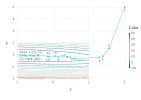

In [103]:

B2=layer(
    x=[steps[i][1] for i in 1:length(steps)],
    y=[steps[i][2] for i in 1:length(steps)],
    label=[string(i) for i in 1:length(steps)],
    Geom.point, Geom.line, Geom.label
)
plot(A, B2)


# 牛顿

In [104]:
function search_for_alpha(f,xk,fk,d,g;
        α0=100,
        ϵ=0.5,
        t=0.5,)
    α=α0
    φ0=d'*g
    while f((xk.+α*d)...)>fk+ϵ*α*φ0
       α=t*α
    end
    return α
end

search_for_alpha (generic function with 1 method)

In [105]:
function Resizable_Newton(f,g,h,x0;
        ϵx=0.01,
        ϵf=0.01,
        ϵg=0.01,
        maxIterations=128,
    debug=false)
    steps=[]
    xk=x0
    fk=f(xk...)
    for i in 1: maxIterations
         gk=g(xk...)
         d=-inv(h(xk...))*gk
        α=search_for_alpha(f,xk,fk,d,gk,α0=1)
        δ=α*d
        xn=xk.+δ
        fn=f(xn...)
         steps=push!(steps,xk)
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
             println("Convergence is reached after",i,"iterations.")
        return (steps)
        end
         if debug
      println("i=",i,"xk=",xk,"d=",d,"δ=",δ,"α=",α,"xn=",xn,"δ=",δ)
            println("fk",fk,"\tfn=",fn)
        end
    xk=xn
    
        fk=fn
    end
    println("WARN",maxIterations,"iterations have been exceeded")
end

Resizable_Newton (generic function with 1 method)

In [106]:
steps=
Resizable_Newton(
    (x,y)->x^2+(33/2)*y^2+3*x*y-x-29*y,
    (x,y)->[2*x+3*y-1,33*y+3*x-29],
   (x,y)-> [2 3 ; 3 33],
    [2.,5.],
    debug=false
)

Convergence is reached after2iterations.


2-element Array{Any,1}:
 [2.0, 5.0]           
 [-0.947368, 0.964912]

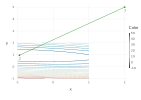

In [107]:

B3=layer(
    x=[steps[i][1] for i in 1:length(steps)],
    y=[steps[i][2] for i in 1:length(steps)],
    label=[string(i) for i in 1:length(steps)],
    Geom.point, Geom.line, Geom.label,Theme(default_color="green")
)
plot(A, B3)


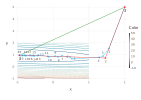

In [108]:
plot(A,B1,B2,B3)